<a href="https://colab.research.google.com/github/Sumaiya607/Data-Analysis-projects/blob/main/project_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [8]:
# Load the dataset using Seaborn
training = sns.load_dataset('titanic')
test = sns.load_dataset('titanic')

training['train test'] = 1
test['train test'] = 0
test['survived'] = np.nan


all_data = pd.concat([training, test])

all_data.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'train test'],
      dtype='object')

In [9]:
# Display the first few rows
print(training.head())

# Summary of the dataset
print(training.info())

# Check for missing values
print(training.isnull().sum())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  train test  
0    man        True  NaN  Southampton    no  False           1  
1  woman       False    C    Cherbourg   yes  False           1  
2  woman       False  NaN  Southampton   yes   True           1  
3  woman       False    C  Southampton   yes  False           1  
4    man        True  NaN  Southampton    no   True           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   

In [10]:
print(training.describe())



         survived      pclass         age       sibsp       parch        fare  \
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208   
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429   
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400   
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200   
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000   
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200   

       train test  
count       891.0  
mean          1.0  
std           0.0  
min           1.0  
25%           1.0  
50%           1.0  
75%           1.0  
max           1.0  


In [ ]:
print(training.describe().columns) ## quick way to seperate numeric columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'train test'], dtype='object')


In [11]:

training = sns.load_dataset('titanic')

df_num = training[['age','sibsp','parch','fare']]
df_cat = training[['pclass','sex','embarked']]

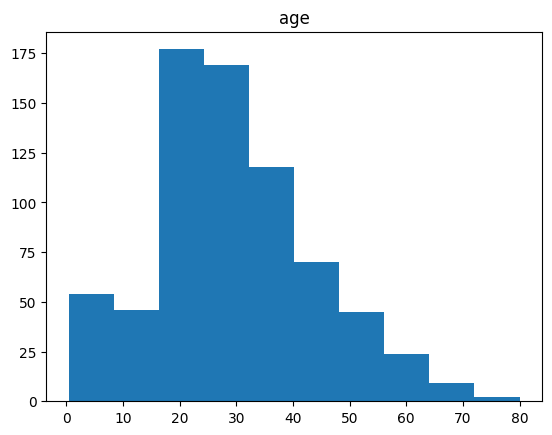

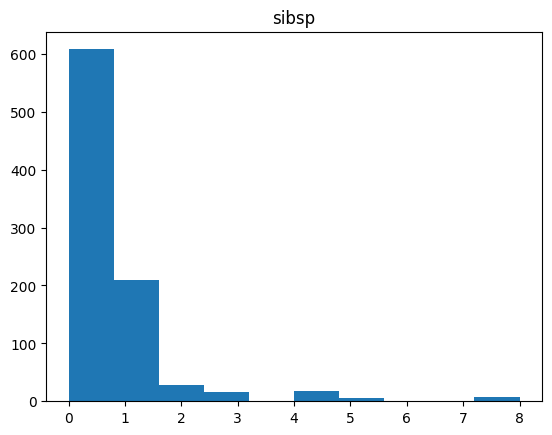

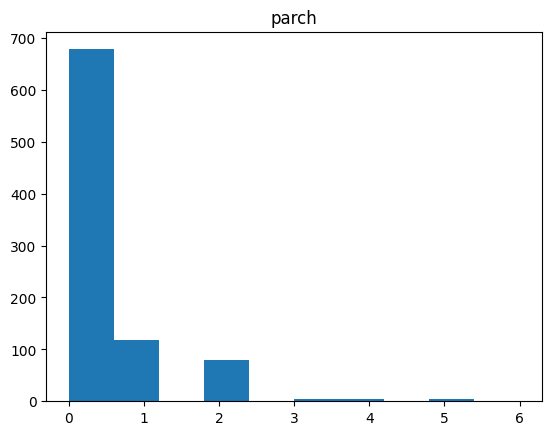

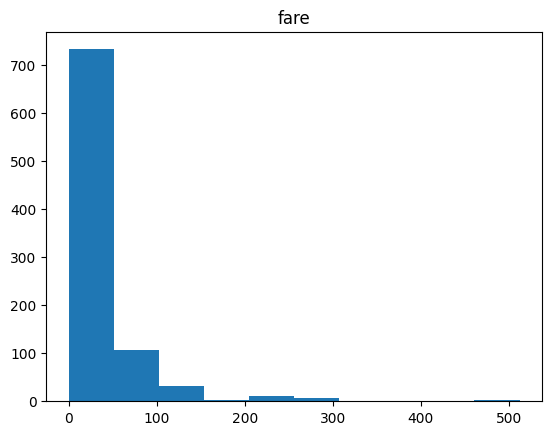

In [12]:
## distriduting all numeric variables
for i in df_num.columns:
  plt.hist(df_num[i])
  plt.title(i)
  plt.show()

            age     sibsp     parch      fare
age    1.000000 -0.308247 -0.189119  0.096067
sibsp -0.308247  1.000000  0.414838  0.159651
parch -0.189119  0.414838  1.000000  0.216225
fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

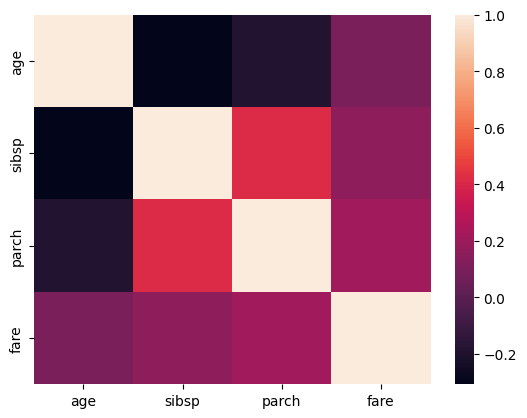

In [13]:
print(df_num.corr())
sns.heatmap(df_num.corr())

fare and age have a weak positive correlation.
sibsp and parch have a moderate positive correlation.
Other combinations show very weak or no correlation.

In [14]:
#comparing survival rate across age parch and fare
pd.pivot_table(training, index = 'survived', values = ['age', 'sibsp','parch','fare'])

,age,fare,parch,sibsp
survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


This code helps to understand if there are any noticeable differences in these characteristics between survivors and non-survivors. For instance, it might reveal if passengers of a certain age group or fare class had a higher chance of survival.

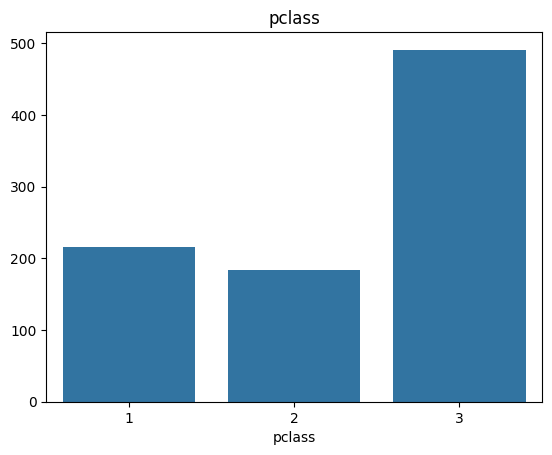

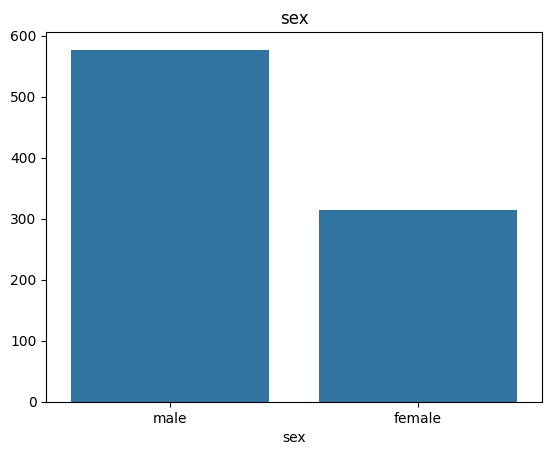

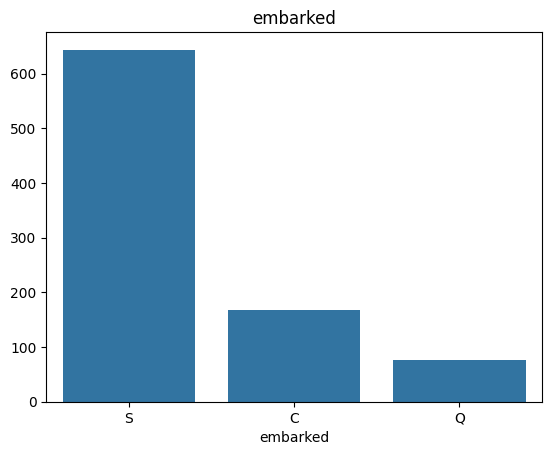

In [15]:
for i in df_cat.columns:
    # Use the values from value_counts() for the height of the bars
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts().values).set_title(i)
    plt.show()


In [16]:
# comparing survival and each of these categorical variables

print(pd.pivot_table(training, index='survived', columns='pclass', values='fare', aggfunc=np.sum))
print()
print(pd.pivot_table(training, index='survived', columns='sex', values='fare', aggfunc=np.sum))
print()
print(pd.pivot_table(training, index='survived', columns='embarked', values='fare', aggfunc=np.sum))

pclass             1          2          3
survived                                  
0          5174.7206  1882.9958  5085.0035
1         13002.6919  1918.8459  1629.6916

sex           female        male
survived                        
0          1864.9752  10277.7447
1         12101.6876   4449.5418

embarked          C         Q          S
survived                                
0         2658.2501  626.7875  8857.6823
1         7414.0461  395.4668  8581.7165


<ipython-input-16-d31b827b27c8>:3: FutureWarning: The provided callable <function sum at 0x797787712e60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(pd.pivot_table(training, index='survived', columns='pclass', values='fare', aggfunc=np.sum))
<ipython-input-16-d31b827b27c8>:5: FutureWarning: The provided callable <function sum at 0x797787712e60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(pd.pivot_table(training, index='survived', columns='sex', values='fare', aggfunc=np.sum))
<ipython-input-16-d31b827b27c8>:7: FutureWarning: The provided callable <function sum at 0x797787712e60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavio

Cherbourg (C): Survivors paid a higher total fare (7414.05) compared to non-survivors (2658.25), suggesting better survival rates for passengers who embarked at Cherbourg.
Queenstown (Q): Non-survivors paid a higher total fare (626.79) compared to survivors (395.47), indicating lower survival rates for those who embarked at Queenstown.
Southampton (S): The total fares are somewhat close (8581.72 for survivors and 8857.68 for non-survivors), indicating a more balanced survival rate.
Interpretation: Passengers who embarked at Cherbourg had better survival rates, possibly due to a higher proportion of 1st class passengers. Those from Queenstown had lower survival rates.

In [17]:
training['train_test'] = 1  # Mark training data
test['train_test'] = 0   # Mark test data
all_data = pd.concat([training, test], axis=0)

(889,)

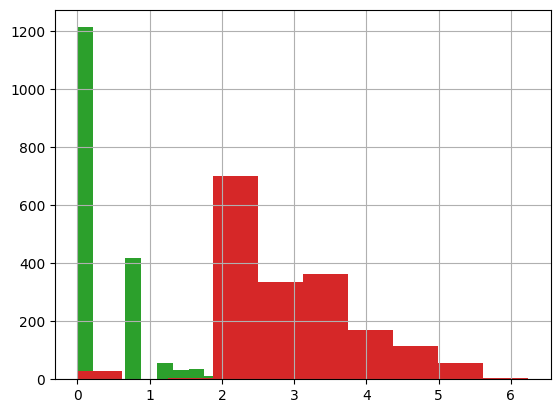

In [18]:
#impute null for continous data
all_data.age = all_data.age.fillna(training.age.mean())
all_data.fare = all_data.fare.fillna(training.fare.mean())

#drop null "embarked" rows.
all_data.dropna(subset = ['embarked'],inplace = True)

#tried log norm of sibsp (not used)
all_data['norm_sibsp'] = np.log(all_data.sibsp+1)
all_data['norm_sibsp'].hist()

# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.fare+1)
all_data['norm_fare'].hist()

#created fare to category for pd.get.dummies()
all_data.pclass = all_data.pclass.astype(str)

#create dummy variables from categories(also can use onehot encoder)
all_dummies = pd. get_dummies (all_data[['pclass','sex','embarked','norm_fare','norm_sibsp','age','train_test']])

#Splite to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis = 1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis = 1)

y_train = all_data[all_data.train_test == 1].survived
y_train.shape#impute null for continous data
all_data.age = all_data.age.fillna(training.age.mean())
all_data.fare = all_data.fare.fillna(training.fare.mean())

#drop null "embarked" rows.
all_data.dropna(subset = ['embarked'],inplace = True)

#tried log norm of sibsp (not used)
all_data['norm_sibsp'] = np.log(all_data.sibsp+1)
all_data['norm_sibsp'].hist()

# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.fare+1)
all_data['norm_fare'].hist()

#created fare to category for pd.get.dummies()
all_data.pclass = all_data.pclass.astype(str)

#create dummy variables from categories(also can use onehot encoder)
all_dummies = pd. get_dummies (all_data[['pclass','sex','embarked','norm_fare','norm_sibsp','age','train_test']])

#Splite to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis = 1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis = 1)

y_train = all_data[all_data.train_test == 1].survived
y_train.shape

# **MODEL BUILDING**

Before going furthur, i like to see how various different models perform with default paramenter. I tried the following models using 5 fold cross validation to get a baseline, With a validation set baseline, we can see how much tuning improves each of the model. Just because a model has a high basline on this validation set doesnt mean thatv it will actually do better on the eventual test set.

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [20]:
## Naive Bayes
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.69662921 0.7752809  0.76404494 0.76966292 0.80225989]
0.7615755729067478


In [21]:
## Logistic Regression
lr = LogisticRegression(solver='liblinear')
cv = cross_val_score(lr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.79213483 0.78651685 0.76966292 0.82485876]
0.788567257030407


In [22]:
## decision tree
dt = tree.DecisionTreeClassifier()
cv = cross_val_score(dt, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.76404494 0.76404494 0.80898876 0.75280899 0.8079096 ]
0.7795594489938423


In [23]:
## knn
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.75280899 0.78651685 0.79213483 0.79775281 0.82485876]
0.7908144480416428


In [24]:
## random forest classification
rf = RandomForestClassifier()
cv = cross_val_score(rf, X_train, y_train, cv=5)
print(cv)
print(cv.mean())


[0.78089888 0.79775281 0.84269663 0.7752809  0.83615819]
0.8065574811147084


In [25]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Create an SVC model
svc = SVC()

voting_clf = VotingClassifier(estimators = [('lr', lr),('knn', knn),('rf', rf),('gnb', gnb),('svc', svc)], voting = 'soft')

In [26]:


!pip install xgboost
#Import the XGBClassifier class from the xgboost library
from xgboost import XGBClassifier

# Define individual classifiers with necessary settings
clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = GaussianNB()
clf4 = SVC(probability=True, random_state=42)  # Enable probability estimates for SVC
clf5 = XGBClassifier(random_state=42)
clf6 = KNeighborsClassifier()  # KNN has predict_proba by default

# Create a VotingClassifier with soft voting
voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('svc', clf4), ('xgb', clf5), ('knn', clf6)],
    voting='soft'
)

# Fit the model (example with training data)
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('gnb', GaussianNB()),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_round...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [27]:
cv = cross_val_score(voting_clf, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.79213483 0.8258427  0.83707865 0.81460674 0.85310734]
0.8245540531962166


In [28]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (fit on training data)
X_test_scaled = scaler.transform(X_test)

# Now you can use X_train_scaled and X_test_scaled in your code
voting_clf.fit(X_train_scaled,y_train)

y_hat_base_vc = voting_clf.predict(X_test_scaled)

# Use the index from the test DataFrame
basic_submission = pd.DataFrame({'Index': X_test.index, 'Survived': y_hat_base_vc})

# Save to CSV
basic_submission.to_csv('basic_submission.csv', index=False)


# **MODEL TUNED PERFORMANCE**

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [30]:
## simple performance reporting function
def clf_performance(classifier, model_name):
  print (model_name)
  print('Best Score: ' + str(classifier .best_score_))
  print('Best Performance: ' + str(classifier.best_params_))


In [31]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],'C':np.logspace(-4, 4, 20),'solver': ['liblinear']}
clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose= True, n_jobs=-1)
best_clf_lr = clf_lr.fit(X_train_scaled, y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Logistic Regression
Best Score: 0.7908271440360567
Best Performance: {'C': 1.623776739188721, 'max_iter': 2000, 'solver': 'liblinear'}


In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':(3,5,7,9)}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose= True, n_jobs=-1)
best_clf_knn = clf_knn.fit(X_train_scaled, y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
KNN
Best Score: 0.8087538881482892
Best Performance: {'n_neighbors': 5}


In [32]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'],'gamma': [.1, .5, 1, 2, 5, 10],
'C': [.1, .5, 1, 2, 5, 10]},

                                {'kernel': ['linear'],'C': [.1, .1, 10, 100, 1000]},
                                {'kernel': ['poly'],'degree': [2, 3, 4,5],'C': [.1, .1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose= True, n_jobs=-1)
best_clf_svc = clf_svc.fit(X_train_scaled, y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 61 candidates, totalling 305 fits
SVC
Best Score: 0.8144163016568274
Best Performance: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [35]:
## Because the total feature space is so large, i have used randomized search to narrow down the paramters
## Because the total feature space is so large, i have used randomized search to narrow down the paramters

rf = RandomForestClassifier(random_state = 1)
param_grid = {'n_estimators': [100,500,1000],
                                  'bootstrap' : [True, False],
                                  'max_depth': [3,5,18,20,50,100,None],
                                  'max_features': ['auto', 'sqrt', 'log2'],
                                  'min_samples_leaf': [1, 2, 4, 10],
                                  'min_samples_split': [2, 5, 10]}

clf_rf = RandomizedSearchCV(rf, param_distributions = param_grid, cv = 5, verbose= True, n_jobs=-1)
best_clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs= -1)
best_clf_rf_rnd = clf_rf.fit(X_train_scaled, y_train) # changed clf_rf_rnd to clf_rf
clf_performance(best_clf_rf_rnd, 'Random Forest')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Random Forest
Best Score: 0.8301910747159271
Best Performance: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 18, 'bootstrap': False}


In [37]:
rf = RandomForestClassifier(random_state= 1)
param_grid = {'n_estimators' : [400,450,500,550],
              'criterion': ['gini','entropy'],
              'bootstrap':[True],
              'max_depth': [15, 20, 25],
              'max_features': ['auto','sqrt',10],
              'min_samples_leaf': [2, 3], # Fixed the typo here
              'min_samples_split': [2, 3]} # Removed the duplicate definition

clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose= True, n_jobs=-1)
best_clf_rf = clf_rf.fit(X_train_scaled, y_train)
clf_performance(best_clf_rf, 'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Random Forest
Best Score: 0.8346791087411921
Best Performance: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 450}


<Axes: >

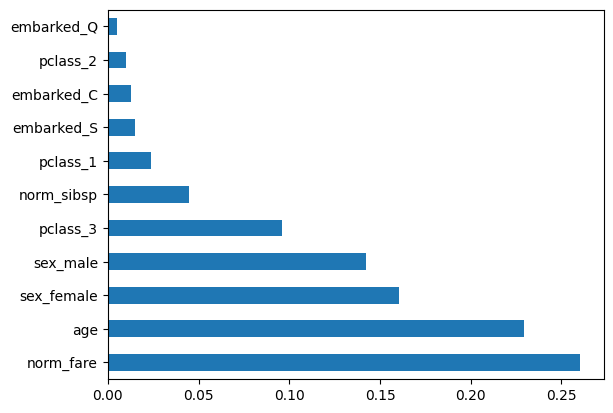

In [39]:
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled, y_train) # Changed best_clf_best_estiliator_ to best_clf_rf.best_estimator_
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

norm_fare: The most important feature according to the model, with the highest importance score.

age: The second most important feature, indicating it plays a significant role in predicting survival.

sex_female and sex_male: Gender is also crucial, with both female and male indicators showing high importance.

pclass_3 and pclass_1: The passenger class categories are important, with pclass_3 being more influential than pclass_1.

norm_sibsp: The normalized number of siblings/spouses aboard is moderately important.

embarked_*: The embarkation points also contribute, although less significantly compared to the other features.


In [41]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}

#clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
#best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
#clf_performance(best_clf_xgb,'XGB')
clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb_rnd,'XGB')

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2590 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1531, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f

XGB
Best Score: 0.8402399542944202
Best Performance: {'subsample': 0.9, 'sampling_method': 'uniform', 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 20, 'learning_rate': 0.7, 'gamma': 0.01, 'colsample_bytree': 0.8}


In [ ]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

In [44]:
# Ensure you run this cell to define best_clf_xgb
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

# Ensure X_test_scaled is already prepared
y_hat_xgb = best_clf_xgb.best_estimator_.predict(X_test_scaled).astype(int)  # Generate predictions

# Replace 'PassengerId' with index
xgb_submission = {'Index': X_test.index, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data=xgb_submission)

# Save to CSV
submission_xgb.to_csv('xgb_submission3.csv', index=False)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best Score: 0.847025963308576
Best Performance: {'colsample_bytree': 0.75, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 550, 'reg_alpha': 1, 'reg_lambda': 5, 'sampling_method': 'uniform', 'subsample': 0.65}


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

clf_knn = GridSearchCV(knn, param_grid=param_grid_knn, cv=5, verbose=True, n_jobs=-1)
best_clf_knn = clf_knn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [47]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard')
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft')
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('lr', best_lr)], voting = 'soft')
voting_clf_xgb = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,X_train,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,X_train,y_train,cv=5).mean())

print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5).mean())


voting_clf_hard : [0.79213483 0.83146067 0.85393258 0.80898876 0.84180791]
voting_clf_hard mean : 0.8256649527074208
voting_clf_soft : [0.7752809  0.81460674 0.83146067 0.82022472 0.83615819]
voting_clf_soft mean : 0.8144226496540343
voting_clf_all : [0.7752809  0.82022472 0.80898876 0.80898876 0.85310734]
voting_clf_all mean : 0.8133180981400369
voting_clf_xgb : [0.81460674 0.8258427  0.84269663 0.82022472 0.84180791]
voting_clf_xgb mean : 0.8301593347298928


In [48]:
#in a soft voting classifier you can weight some models more than others. I used a grid search to explore different weightings
#no new results here
params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_train_scaled,y_train)
clf_performance(best_clf_weight,'VC Weights')
voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test_scaled)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
VC Weights
Best Score: 0.8234177616961847
Best Performance: {'weights': [1, 2, 1]}


In [50]:
##Make Predictions
voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_all.fit(X_train_scaled, y_train)
voting_clf_xgb.fit(X_train_scaled, y_train)

best_rf.fit(X_train_scaled, y_train)
y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_hat_rf = best_rf.predict(X_test_scaled).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_test_scaled).astype(int)
y_hat_vc_all = voting_clf_all.predict(X_test_scaled).astype(int)
y_hat_vc_xgb = voting_clf_xgb.predict(X_test_scaled).astype(int)

In [51]:
# Convert output to DataFrames using the index as the identifier
final_data = {'Index': X_test.index, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'Index': X_test.index, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'Index': X_test.index, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'Index': X_test.index, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'Index': X_test.index, 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data=final_data_5)

# Create a comparison DataFrame using the index as the identifier
final_data_comp = {
    'Index': X_test.index,
    'Survived_vc_hard': y_hat_vc_hard,
    'Survived_rf': y_hat_rf,
    'Survived_vc_soft': y_hat_vc_soft,
    'Survived_vc_all': y_hat_vc_all,
    'Survived_vc_xgb': y_hat_vc_xgb
}
comparison = pd.DataFrame(data=final_data_comp)

# Save any of these DataFrames to CSV if needed
submission.to_csv('submission_rf.csv', index=False)
submission_2.to_csv('submission_vc_hard.csv', index=False)
submission_3.to_csv('submission_vc_soft.csv', index=False)
submission_4.to_csv('submission_vc_all.csv', index=False)
submission_5.to_csv('submission_vc_xgb.csv', index=False)
comparison.to_csv('comparison.csv', index=False)



In [52]:
#track differences between outputs
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis =1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis =1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis =1)


In [53]:
comparison.difference_hard_all.value_counts()

,count
difference_hard_all,
0,860
1,29


860: This number indicates the count of instances where the predictions made by the "hard" voting classifier and the "all" voting classifier (or whatever the comparison is) agree (i.e., no difference between them).

29: This number indicates the count of instances where the predictions made by the "hard" voting classifier and the "all" voting classifier disagree (i.e., there is a difference between them).